In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
UA=149597870700. #m
t_list=[i for i in range(0,31536000,1*24*60**2)] # t de 0 a 1 año (en segundos) en intervalos de 1 dias
e=.5
a=1.*UA #m
G=6.674e-11 #Nm^2/kg^2
Ms=1.989e30 #kg

In [3]:
def AnomEx(E,t): # Defino la funcion para la anomalia Exentrica para poder hallar E
    return E-e*np.sin(E)-t*(G*Ms/a**3)**.5

In [4]:
def E(t): #Defino la funcion otra vez para que me arroje su valor en un tiempo t
    a0=-.9
    b0=6.5  # Este intervalo sirve para ubicar el cero con cada t, ya que solo hay uno en cada caso

    Nmax=1000 # Número máximo de iteraciones 
    Tol=1.e-8  # Tolerancia, que no exeda el épsilon de la máquina
    error=1. # Error inicial
    i=0 # iteracion

    ai=a0
    bi=b0

    if(AnomEx(a0,t)*AnomEx(b0,t)<0):

        while(error>Tol):
            p=(bi+ai)*.5
            p_prev=p
            if(AnomEx(a0,t)*AnomEx(p,t)<0):
                bi=p
                ai=ai
            elif(AnomEx(b0,t)*AnomEx(p,t)<0):
                ai=p
                bi=bi
            i+=1
            p=(bi+ai)*.5
            error=abs(p-p_prev)

            #print("i=%.1f \t ai=%.5f \t bi=%.5f \t pi=%.5f \t f(p)=%.5f \t error=%.5f" %(i,ai,bi,p,f(p),error)) # P es el cero (o la interseccion)

            if(i>=Nmax):
                print("Numero maximo de iteraciones excedido")
                break
        return p 
    else:
        print("Intervalo inadecuado")

In [5]:
def r(f): #radio r
    return a*(1-e**2)/(1+e*np.cos(f))
def f(E):   #Anomalia verdadera f
    return 2.*np.arctan(((1+e)/(1-e))**.5*np.tan(E/2.))

In [6]:
f_list=[f(E(i)) for i in t_list] #Anomalia verdadera
r_list=[r(i)/UA for i in f_list] #radio

In [7]:
x_list=[r_list[i]*np.cos(f_list[i]) for i in range(len(r_list))]
y_list=[r_list[i]*np.sin(f_list[i]) for i in range(len(r_list))]

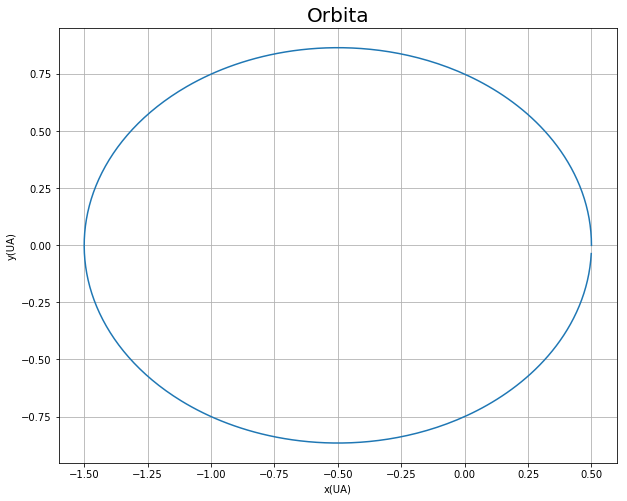

In [8]:
fig=plt.figure(figsize=(10,8))
ax=plt.axes()
ax.grid()
ax.plot(x_list,y_list)
plt.xlabel('x(UA)')
plt.ylabel('y(UA)')
plt.title('Orbita', fontsize=20)
plt.show()

In [9]:
v_list=[(G*Ms*(2./(r*UA)-1./a))**.5 for r in r_list] #Velocidad m/s^2
e_list=[.5*v_list[i]**2-G*Ms/(r_list[i]*UA) for i in range(len(r_list))]

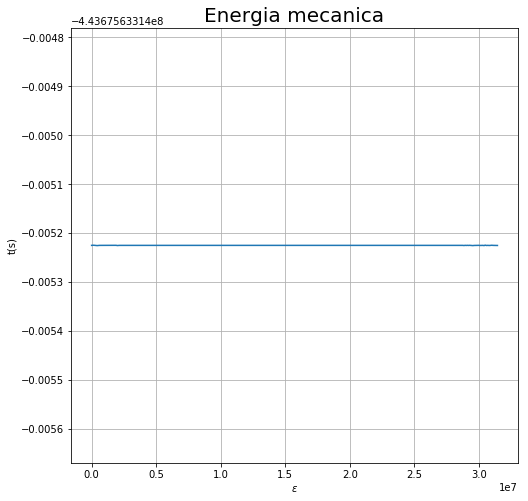

In [10]:
fig=plt.figure(figsize=(8,8))
ax=plt.axes()
ax.grid()
ax.plot(t_list,e_list)
plt.xlabel('$\epsilon$')
plt.ylabel('t(s)')
plt.title('Energia mecanica', fontsize=20)
plt.show()